# Matching Pursuit 2D

X_GT and Fast, normalized

Import

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image
import pywt
import pywt.data
from utils_wavelet import *
import scipy.stats as stats

Functions

In [3]:
def fun_conv(A,B):
    conv = signal.fftconvolve(A,B,mode='same')
    return conv

def naive_conv(A,B):
    C = np.zeros(len(A))
    for i in range(len(A)):
        C[i] = np.sum(A*np.roll(np.roll(np.flip(B),1),i))
    return C

def manual_conv(A,B):
    C = np.zeros(len(A))
    for m in range(len(A)):
        for i in range(len(B)):
            C[m] += A[i]*B[m-i]
    return C

def fun_auto(A):
    auto = signal.fftconvolve(A,np.flip(A),mode='same')
    return auto

def imshowArray(arr):
    plt.imshow((arr,arr))
    plt.ylim([0,1])

def npArray2arrayList(a_vector):
    fake_a_coef = pywt.wavedec(a_vector,'db1')
    a_vector_array = vec2arrayList(a_vector,fake_a_coef)
    return a_vector_array

def npMatrix2arrayList(a_matrix):
    fake_a_coef = pywt.wavedec2(a_matrix,'db1')
    a_vector_array = vec2arrayList(a_matrix.flatten(),fake_a_coef)
    return a_vector_array

def L0norm(vector,zero=1e-5):
    L0 = vector[np.where(abs(vector)>zero)].size
    return L0

def flipNroll(matrix):
    return np.roll(np.flip(matrix),(1, 1), axis=(1, 0))

PSF vector h

In [4]:
global_factor = 4

def image_open(location):
    image_im = Image.open(location)
    realsize=image_im.size
    newsize=tuple(int(ti/global_factor) for ti in realsize)
    image_im=image_im.resize(newsize,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    return image_im

def image_open_newsize(location,newsize):
    image_im = Image.open(location)
    image_im=image_im.resize(newsize,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    return image_im

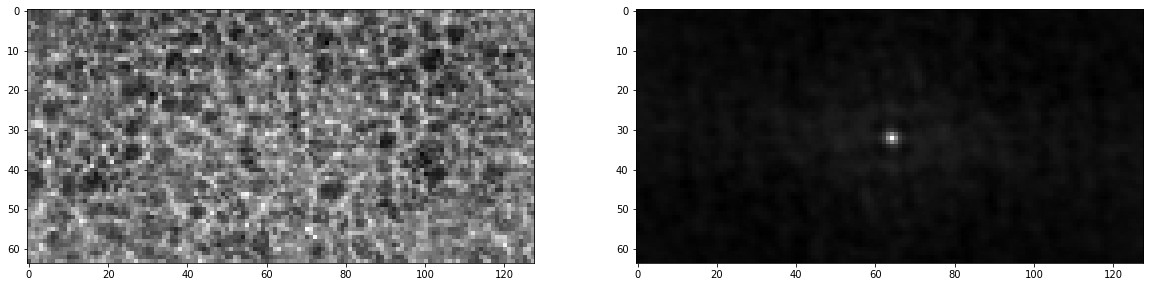

In [5]:
# sx = 64
# sy = 128

sx = 64
sy = 128

h = image_open_newsize('from_camera/test10/h.png',(sy,sx)) - image_open_newsize('from_camera/test10/h_black.png',(sy,sx))
h -= np.mean(h)

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.imshow(h,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(fun_auto(h),cmap='gray')
plt.show()

In [36]:
# h = np.zeros((sx,sy))
# h[math.floor(sx/2)-1,math.floor(sy/2)-1] = 1

# # x=np.arange(sx)
# # y=np.arange(sy)
# # [xx,yy]=np.meshgrid(y,x)
# # mu_x = math.floor(sy/2)-1
# # mu_y = math.floor(sx/2)-1
# # sig = 1
# # h = np.exp(-((xx-mu_x)**2+(yy-mu_y)**2)/(2*sig**2) )*2

# # print('sum =',np.sum(h))

# # plt.figure()
# # plt.imshow(h,cmap='gray')
# # plt.colorbar()
# # plt.show()

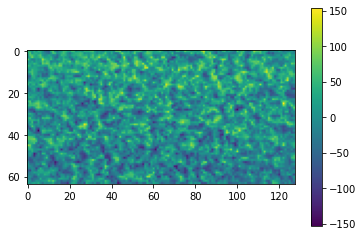

In [6]:
plt.figure()
plt.imshow(np.flip(h)-h)
plt.colorbar()
plt.show()

In [38]:
# h_x = np.linspace(-d*2,d*2,d)

# h_sig=1
# h = np.exp(-h_x**2/(2*h_sig**2))

# h = np.fft.fftshift(h)
# h /= np.linalg.norm(h)

# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


In [39]:
# h_x = np.linspace(-d*5,d*5,d-1)

# h_sig=6
# h = np.exp(-h_x**2/(2*h_sig**2))
# h = np.append(h,0)

# # h = np.fft.fftshift(h)
# # h /= np.linalg.norm(h)
# h /= np.sum(h)

# print(np.sum(h))
# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


In [40]:
# h = np.zeros(d)
# h[0] = 0.8
# h[1] = 0.2
# # h *=0.8
# # h = np.random.randn(d)

# # h /= np.sum(h)
# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


Offline computation

0.0 %
0.01220703125 %
0.0244140625 %
0.03662109375 %
0.048828125 %
0.06103515625 %
0.0732421875 %
0.08544921875 %
0.09765625 %
0.10986328125 %
0.1220703125 %
0.13427734375 %
0.146484375 %
0.15869140625 %
0.1708984375 %
0.18310546875 %
0.1953125 %
0.20751953125 %
0.2197265625 %
0.23193359375 %
0.244140625 %
0.25634765625 %
0.2685546875 %
0.28076171875 %
0.29296875 %
0.30517578125 %
0.3173828125 %
0.32958984375 %
0.341796875 %
0.35400390625 %
0.3662109375 %
0.37841796875 %
0.390625 %
0.40283203125 %
0.4150390625 %
0.42724609375 %
0.439453125 %
0.45166015625 %
0.4638671875 %
0.47607421875 %
0.48828125 %
0.50048828125 %
0.5126953125 %
0.52490234375 %
0.537109375 %
0.54931640625 %
0.5615234375 %
0.57373046875 %
0.5859375 %
0.59814453125 %
0.6103515625 %
0.62255859375 %
0.634765625 %
0.64697265625 %
0.6591796875 %
0.67138671875 %
0.68359375 %
0.69580078125 %
0.7080078125 %
0.72021484375 %
0.732421875 %
0.74462890625 %
0.7568359375 %
0.76904296875 %
0.78125 %
0.79345703125 %
0.8056640625 %
0.

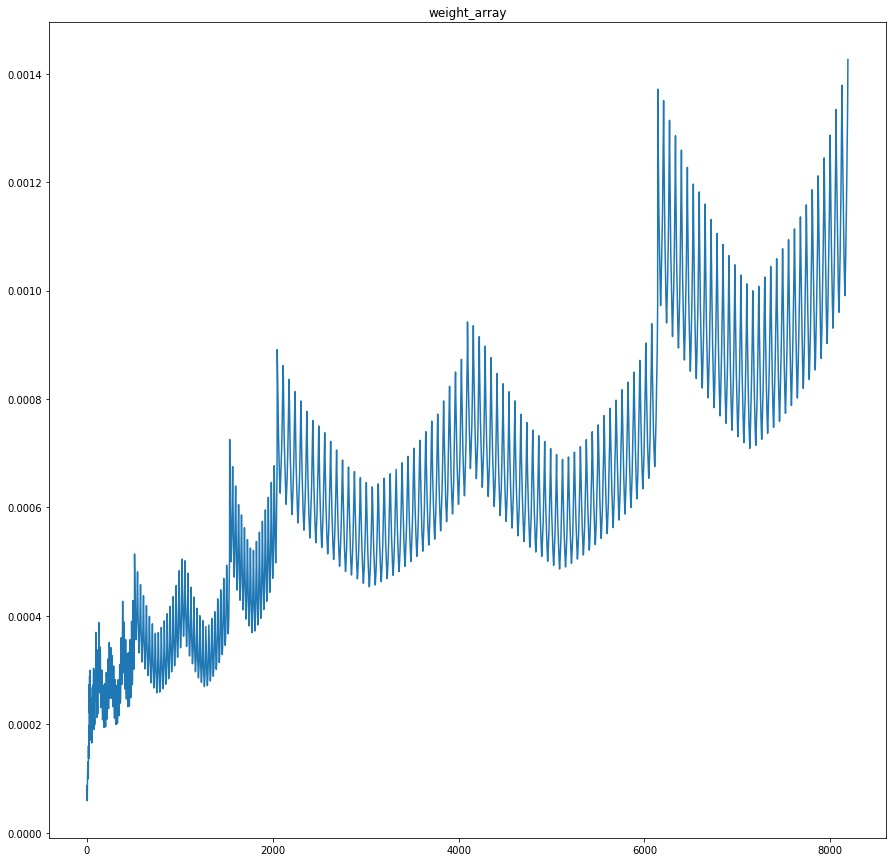

In [7]:
#Offline computation (about 20 secons)
weight_array = np.zeros(sx*sy)

for i in range(sx*sy):
    #step 1
    e = np.zeros(sx*sy)
    e[i] = 1
    e = e.reshape(sx,sy)
    psi_i = pywt.waverec2(npMatrix2arrayList(e),'db1')
    #step 2
    theta_i = fun_conv(h,psi_i)
    #step 3
    weight_i = 1/np.linalg.norm(theta_i)
    weight_array[i] = weight_i
    print(round(i/sx/sy*100,3),'%')

plt.figure(figsize=(15,15))
plt.plot(weight_array)
plt.title('weight_array')
plt.show()

In [8]:
#  #np.savetxt('meory/w128x256.txt', weight_array, delimiter=' ')

In [9]:
# weight_array=np.loadtxt('memory/w128x256.txt', dtype=float, delimiter=' ')

Image x

In [44]:
# #defining vector a
# nz = 4
# np.random.seed(2)
# x_xpos = np.random.randint(0,sx,nz)
# x_ypos = np.random.randint(0,sy,nz)
# x_GT = np.zeros((sx,sy))
# x_GT[x_xpos,x_ypos] = abs(np.random.normal(0,1,nz))


# plt.figure(figsize=(7,7))
# plt.imshow(x_GT,cmap='gray')
# plt.title('x GT')
# plt.colorbar(orientation='horizontal')
# plt.show()

456


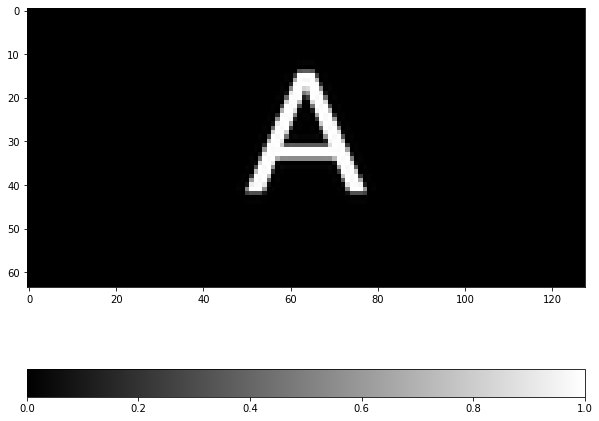

In [10]:
x_GT = image_open_newsize('images/a.png',(sy,sx))/255
# x_GT = image_open_newsize('images/face.png',(sy,sx))/255

print(x_GT[np.where(x_GT>(1e-5))].size) #L0 norm

plt.figure(figsize=(10,10))
plt.imshow(x_GT,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.show()

L0 alfa = 638
Diff = -3.8853206043382333e-13


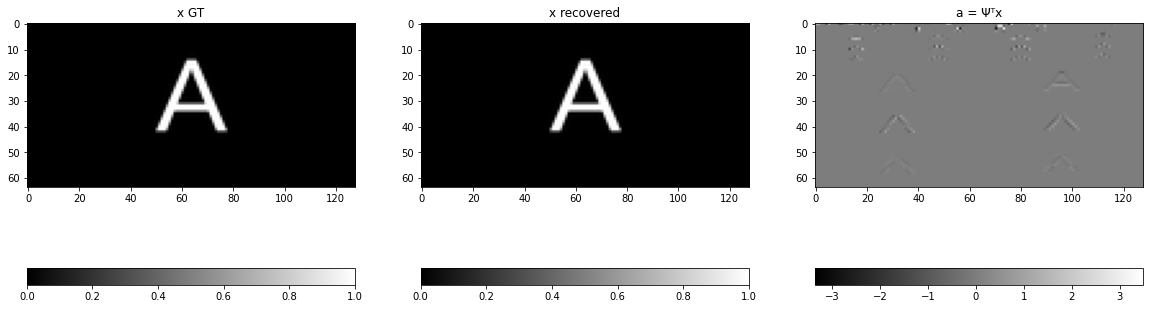

In [11]:
# fake_x_vector = np.ones((sx,sy))
# fake_coef = pywt.wavedec2(fake_x_vector,'db1')
# a_GT
# a_real_array = vec2arrayList(a_GT.flatten(),fake_coef) 

alfa = arrayList2vec(pywt.wavedec2(x_GT,'db1')).reshape((sx,sy))
L0alfa = L0norm(alfa)
print('L0 alfa =',L0alfa)
x_recovered = pywt.waverec2(npMatrix2arrayList(alfa),'db1')


print('Diff =',np.sum(x_GT-x_recovered))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(x_GT,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('x GT')
plt.subplot(1,3,2)
plt.imshow(x_recovered,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('x recovered')
plt.subplot(1,3,3)
plt.imshow(alfa,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('a = Ψᵀx')
plt.show()

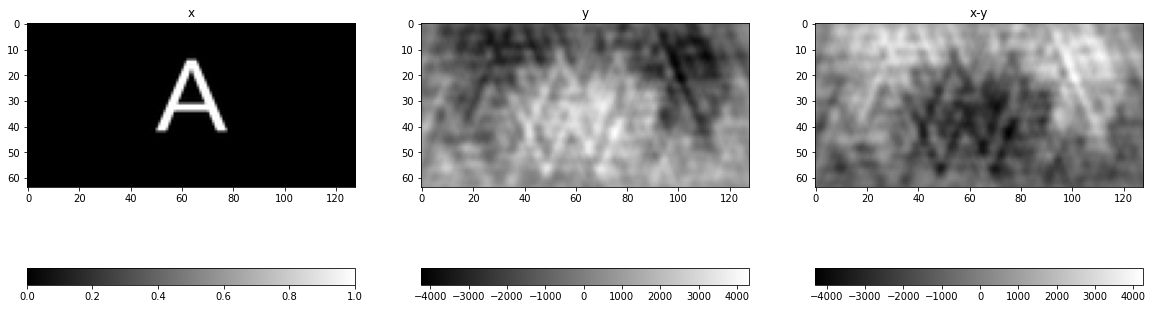

In [12]:
y = fun_conv(h,x_GT)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(x_GT,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('x')
plt.subplot(1,3,2)
plt.imshow(y,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('y')
plt.subplot(1,3,3)
plt.imshow(x_GT-y,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('x-y')
plt.show()

MP loop

c = 79351.66844756038
<r(k+1),Θ(i*)> = 0.0, ans: -0.005047090161869486
k ← 1
c = 38000.29271795129
<r(k+1),Θ(i*)> = 0.0, ans: 0.0011833364726378214
k ← 2
c = -53315.365640166776
<r(k+1),Θ(i*)> = 0.0, ans: 0.0012915163523831658
k ← 3
c = 39990.3289675916
<r(k+1),Θ(i*)> = 0.0, ans: -0.004781624970676476
k ← 4
c = -30373.468689304977
<r(k+1),Θ(i*)> = 0.0, ans: 0.0014830974688274392
k ← 5
c = -28440.45767245345
<r(k+1),Θ(i*)> = 0.0, ans: 0.0020039916819187664
k ← 6
c = 29424.488317133135
<r(k+1),Θ(i*)> = 0.0, ans: -7.029985672991334e-05
k ← 7
c = 13899.84131652755
<r(k+1),Θ(i*)> = 0.0, ans: -0.0004151302561231604
k ← 8
c = -21218.328751518853
<r(k+1),Θ(i*)> = 0.0, ans: 0.0008959399705524668
k ← 9
c = 23379.126487252695
<r(k+1),Θ(i*)> = 0.0, ans: -0.0005880351027590289
k ← 10
c = -8321.981456551168
<r(k+1),Θ(i*)> = 0.0, ans: -0.000175309107057455
k ← 11
c = -20993.78973737211
<r(k+1),Θ(i*)> = 0.0, ans: 0.0006641619501576676
k ← 12
c = 21037.771052932574
<r(k+1),Θ(i*)> = 0.0, ans: -0.0004460

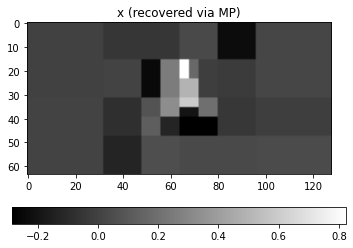

In [16]:
r = np.copy(y)
a = np.zeros(sx*sy)
k = 0
s = L0alfa
plotting_product = np.array([])
plotting_residue = np.array([])
residue_norm = 1e10

while (k<s): 
    #atom selection
    Hr = fun_conv(flipNroll(h),r)  #had to flip the psf
    YTHr = arrayList2vec(pywt.wavedec2(Hr,'db1'))
    i_star = np.argmax(abs(YTHr))

    e = np.zeros(sx*sy)
    e[i_star] = 1
    e = e.reshape(sx,sy)
    psi_i_star = pywt.waverec2(npMatrix2arrayList(e),'db1')
    theta_i_star = fun_conv(h,psi_i_star)
    theta_norm = np.linalg.norm(theta_i_star)
    c = np.sum(theta_i_star*r)/theta_norm
    print('c =',c)

    #coef. update
    a[i_star] = c

    #residual update
    r -= c*theta_i_star/theta_norm
    print('<r(k+1),Θ(i*)> = 0.0, ans:',np.sum(r*theta_i_star)*theta_norm)

    #plotting elements
    plotting_product = np.append(plotting_product,c)
    residue_norm = np.linalg.norm(r)
    plotting_residue = np.append(plotting_residue,residue_norm)
    
    #next
    k += 1
    print('k ←',k)

a_MP = a*weight_array
a_MP = a_MP.reshape((sx,sy))
x_MP = pywt.waverec2(npMatrix2arrayList(a_MP),'db1')

plt.imshow(x_MP,cmap='gray')
plt.title('x (recovered via MP)')
plt.colorbar(orientation="horizontal")
plt.show()

C:\Users\Usuari\AppData\Local\Temp\ipykernel_6048\605482546.py:21: RuntimeWarning: invalid value encountered in double_scalars
  error_pond = np.sum(x_GT*x_MP)/np.linalg.norm(x_GT)/np.linalg.norm(x_MP)


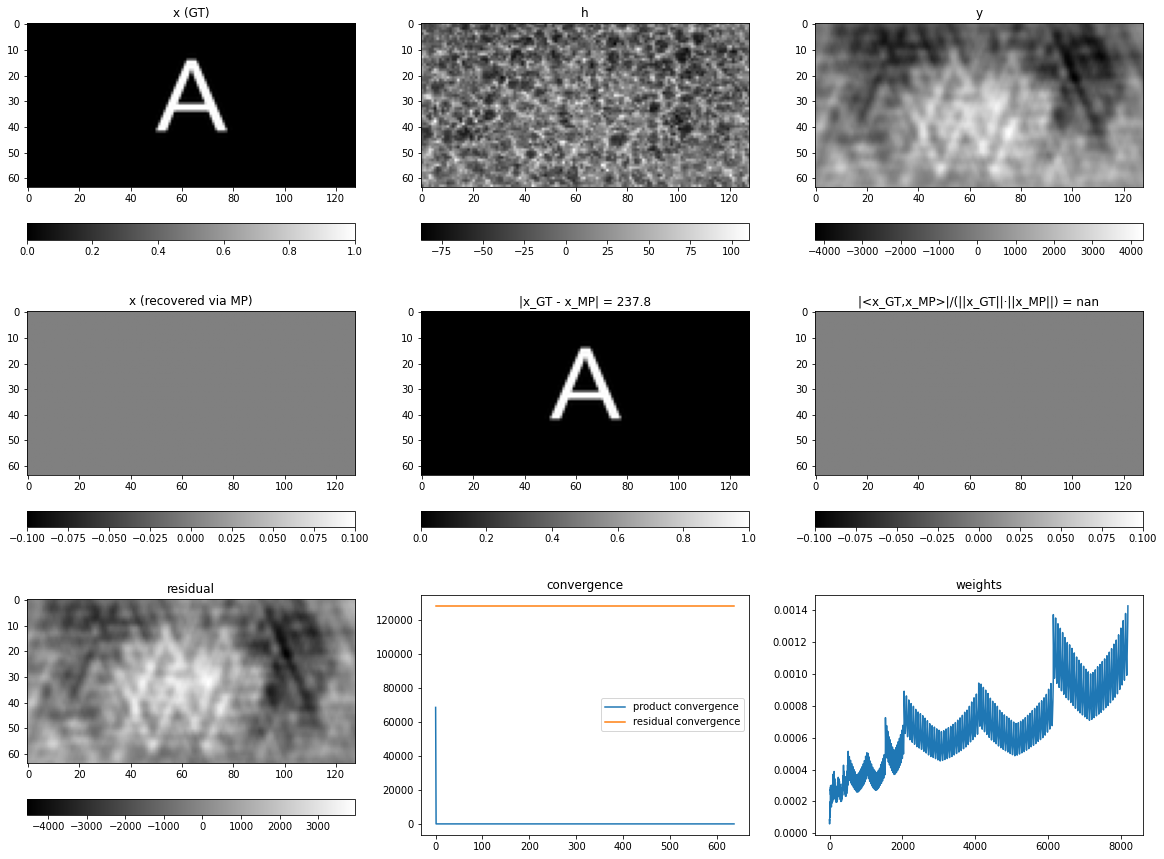

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.imshow(x_GT,cmap='gray')
plt.title('x (GT)')
plt.colorbar(orientation="horizontal")


plt.subplot(3,3,4)
plt.imshow(x_MP,cmap='gray')
plt.title('x (recovered via MP)')
plt.colorbar(orientation="horizontal")

plt.subplot(3,3,5)
plt.imshow(np.abs(x_GT-x_MP),cmap='gray')
plt.title('|x_GT - x_MP| = '+str(round(np.sum(np.abs(x_GT-x_MP)),2)))
plt.colorbar(orientation="horizontal")

plt.subplot(3,3,6)
plt.imshow(x_GT*x_MP,cmap='gray')
error_pond = np.sum(x_GT*x_MP)/np.linalg.norm(x_GT)/np.linalg.norm(x_MP)
plt.title('|<x_GT,x_MP>|/(||x_GT||·||x_MP||) = '+str(round(error_pond,2)))
plt.colorbar(orientation="horizontal")

plt.subplot(3,3,3)
plt.imshow(y,cmap='gray')
plt.title('y')
plt.colorbar(orientation="horizontal")

plt.subplot(3,3,2)
plt.imshow(h,cmap='gray')
plt.title('h')
plt.colorbar(orientation="horizontal")

plt.subplot(3,3,7)
plt.imshow(r,cmap='gray')
plt.title('residual')
plt.colorbar(orientation="horizontal")

plt.subplot(3,3,8)
plt.plot(plotting_product,'-',label='product convergence')
plt.plot(plotting_residue,'-',label='residual convergence')
plt.legend()
plt.title('convergence')

plt.subplot(3,3,9)
plt.plot(weight_array)
plt.title('weights')

plt.savefig('resultats/mp/fast.png', bbox_inches='tight')
plt.show()

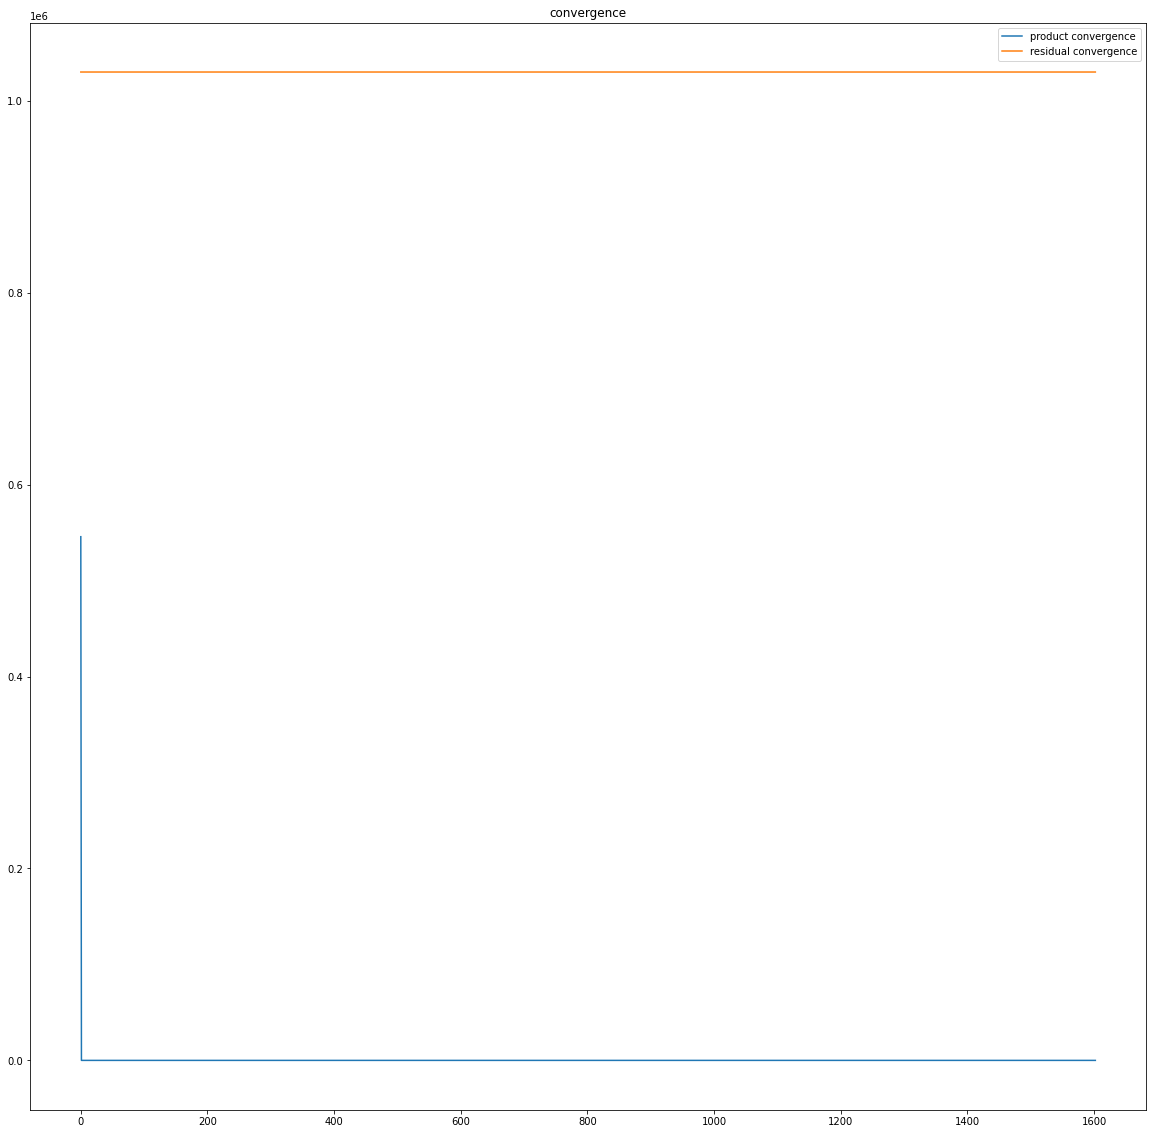

In [50]:
plt.figure(figsize=(20,20))
plt.plot(plotting_product,'-',label='product convergence')
plt.plot(plotting_residue,'-',label='residual convergence')
plt.legend()
plt.title('convergence')

# plt.savefig('resultats/mp/fast.png', bbox_inches='tight')
plt.show()